In [96]:
#calculates distance between points and returns decimal amt of hours
def calc_distance(p1, p2): 
    """
    Calculate the distance
    between two points and 
    returns decimal representing
    time it took in hours
    """
    dt = (sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)) * 2
    return dt / 60

In [110]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from math import sqrt

def robbing_spree():
    """
    Function that calculates a route for robbing banks.
    Time limit is in hours, and df is sorted by bank value.
    (money you get for time it takes to rob bank). Returns
    a list of bank IDs and total amount stolen.
    """
    data = pd.read_csv('bank_data.csv')
    data_ = data

    time_limit = 24
    elapsed_time = 0
    bank_id = []
    money = 0

    data_['bank_value'] =  data_['money'] / (data_['time (hr)'] * 60)
    sorted_data = data_.sort_values(['bank_value'],ascending=False)


    while elapsed_time < time_limit:
        current_bank = sorted_data.iloc[0] # Start at most profitable bank
        next_bank = sorted_data.iloc[1] # Use 1 because we're dropping the previous one all the time
        # Calculates the travel time from this row to next row
        travel_time = calc_distance((current_bank['x_coordinate'],current_bank['y_coordinate']),
                                        (next_bank['x_coordinate'],next_bank['y_coordinate']))       
        # Combines travel time with time taken to rob the bank
        total_time = travel_time + current_bank['time (hr)']
        elapsed_time += total_time
        # Append the id of the bank we just robbed as int
        bank_id.append(int(current_bank['id']))
        money += current_bank['money']
        # Checks if we have enough time to rob another bank and make it to the helipad on time
        time_to_helipad = elapsed_time + calc_distance((next_bank['x_coordinate'],next_bank['y_coordinate']),
                                               (0,0)) + next_bank['time (hr)']
        # Drop the current bank we just robbed
        sorted_data.drop(current_bank[0],inplace=True)

        if time_to_helipad >= time_limit:
            break

    else:
        print('Jail time!')

    return money, bank_id

robbing_spree()

(6375000.0,
 [3613,
  9546,
  3803,
  6528,
  9583,
  5933,
  9195,
  4757,
  8550,
  4499,
  9241,
  7343,
  3798,
  7544,
  4762,
  8436,
  8562,
  6097,
  487,
  2928,
  5135,
  865,
  3914,
  4987,
  3466,
  7560,
  8579,
  8690,
  8469,
  433,
  524,
  6468,
  1914,
  1757,
  8287,
  7258,
  4725,
  8206,
  4605,
  7064,
  3926,
  9401,
  9736,
  2331,
  9653,
  7074,
  2346,
  8966,
  4696,
  8022,
  4789,
  6740,
  9881,
  70,
  2656,
  951,
  209,
  58,
  9228,
  3193,
  8525,
  5610,
  2037,
  4287,
  6022,
  2827,
  8849,
  9378,
  6104,
  2741,
  7701,
  8355,
  5563,
  3005,
  7665,
  6987,
  5719,
  2729,
  1997,
  8286,
  4906,
  613,
  790,
  7087,
  5126,
  5562,
  3516,
  2243,
  6759,
  3026,
  1372,
  2442,
  1733,
  8375,
  7764,
  7649,
  7689,
  9880,
  3297,
  4794,
  3089,
  7583,
  5725,
  517,
  4345,
  2521,
  2190,
  5155,
  9049,
  444,
  6712,
  8908,
  8703,
  7877,
  7595,
  8231,
  9275,
  4465,
  5295,
  5296,
  299,
  8846,
  6254,
  507,
  6535,
  62

In [102]:
## Verification ##

In [103]:
travel_list = bank_id
df = data

127 banks robbed for a total of 6375000 dollars


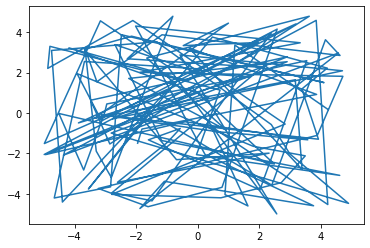

In [104]:
import matplotlib.pyplot as plt
def verify(travel_list, df):
    plt.plot(df.x_coordinate[travel_list], df.y_coordinate[travel_list])
    print(f'{len(travel_list)} banks robbed for a total of {sum(df.money[travel_list])} dollars')
    
verify(travel_list, df)

In [105]:
import math


def distance(x1, y1, x2, y2):
    return math.hypot(x2 - x1, y2 - y1)

def check_solution(travel_list, df, speed=30.):
    """
    Check a bank robber algorithm solution
    
    input:
    ------
    travel_list: a list of integers
        Your solution to the bank robber problem
        Bank IDs are row indeces into the df passed
    df: pd.DataFrame
        The algorithm input formatted dataframe 
        (id,x_coordinate,y_coordinate,money,time (hr))
    speed: float
        The km/h speed of travel
    """
    t_remaining = 24.
    score = 0.
    assert len(travel_list) == len(set(travel_list)), (
        "Your travel list must have unique IDs!"
    )
    prev = travel_list[0]
    for e in travel_list:
        row = df.iloc[e]
        score += row['money']
        t_remaining -= row['time (hr)']
        dist = distance(
            row['x_coordinate'], row['y_coordinate'],
            df.iloc[prev]['x_coordinate'],
            df.iloc[prev]['y_coordinate'],
        )
        t_remaining -= dist / speed
        prev = e
    assert t_remaining >= 0, (
        f"Used more than 24h! Time left: {t_remaining}"
    )
    # still gotta get to (0, 0)
    dist = distance(row['x_coordinate'],row['y_coordinate'],0,0)
    final_t = t_remaining - (dist / speed)
    assert final_t >= 0, (
        f"Not enough time to get to helicopter!\n"
        f"Time left after last bank: {t_remaining}\n"
        f"Distance to (0,0) helipad: {dist}\n"
    )
    print(f"Time Remaining: {final_t}")
    return score
check_solution(travel_list, df, speed=30.)

Time Remaining: 0.2836131123945305


6375000.0